# **단변량분석_범주형변수**

## **1.환경준비**

### **(1) 라이브러리 불러오기**

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩**

#### **1) titanic**
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

In [47]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


#### **2) New York Air Quality**

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date : 연,월,일

In [48]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **2.범주형 변수**

### **(1) 수치화 : 기초통계량**

* 범주형 변수 -> 범주별 빈도수와 비율 확인
* 리스트.count(‘값’)
    * 해당 값이 몇 개 있는지 count
    * Count를 전체 개수(len(gender))로 나눠서 비율 확인

#### **1) 범주별 빈도수**
* .value_counts() : 범주의 개수와 상관 없이 범주 별 개수를 count 해 줌

In [50]:
titanic['Embarked'].value_counts()

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

#### **2) 범주별 비율**
* .value_counts(normalize = True)

In [51]:
titanic['Embarked'].value_counts(normalize = True)

Embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

* titanic['Pclass’] 해석
    * .value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할 수 있다
    * 3등급 객실 탑승객이 전체에서 55%를 차지합니다.
    * 1등급 객실이 24%, 2등급 객실이 20.7 %



titanic의 Pclass 기초 통계량

In [52]:
titanic['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

titanic의 Survived 기초통계량

In [53]:
titanic['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

### **(2) 시각화**

#### **1) bar chart**

* seaborn의 countplot
    * plt.bar() 이용 시 먼저 집계 후 그래프 그리기
    * countplot: 집계 + bar_plot 한 번에 수행

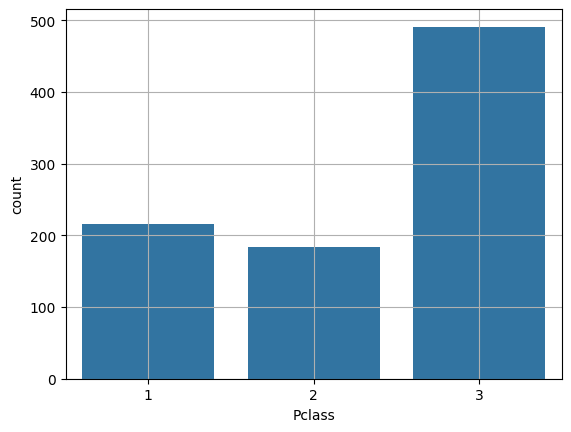

In [54]:
sns.countplot(x = 'Pclass', data = titanic)
plt.grid()
plt.show()

titanic-Embarked

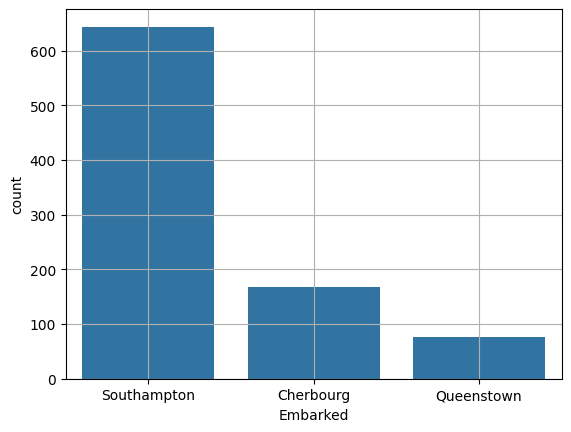

In [55]:
sns.countplot(x = 'Embarked', data = titanic)
plt.grid()
plt.show()

#### **2) (추가) pie chart**

* 범주별 비율 비교할 때 파이차트 사용.
* 마찬가지로 선 집계 후 사용
* plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)
    * autopct = ‘%**.2f%**%’ : 그래프에 표시할 값 비율 값에 대한 설정
        * **.2f%** : 소수점 두 자리 퍼센트로 표기


* pie chart 기본

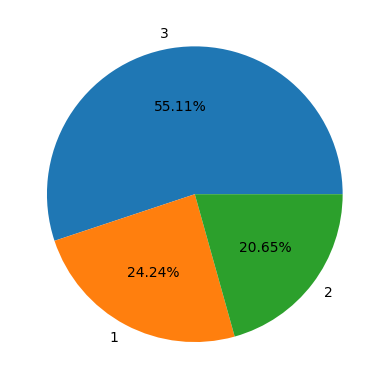

In [56]:
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

* pie chart 꾸미기 1

    * 각도와 방향 조정
        * startangle = 90 : 90도 부터 시작
        * counterclock = False : 시계 방향으로

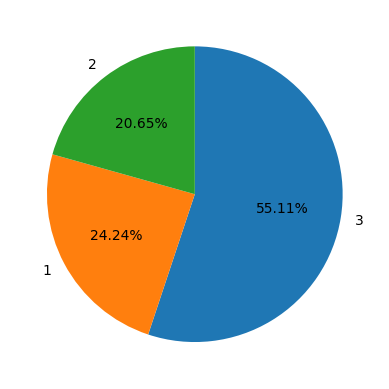

In [57]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False)
plt.show()

* pie chart 꾸미기 2

    * 간격 띄우고, 그림자 넣기
        * explode = [0.05, 0.05,0.05] : 중심으로 부터 1,2,3 을 얼마만큼 띄울지
        * shadow = True : 그림자 추가



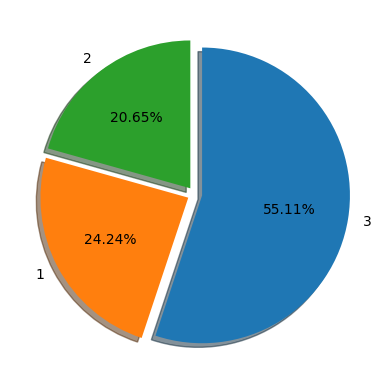

In [58]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False,
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

## **3.복습문제**

### (1) 환경준비
* 라이브러리 불러오기

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**변수설명**
> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


### (2) 단변량 분석

* chas(찰스강변 여부)

In [64]:
temp = boston['chas'].value_counts()

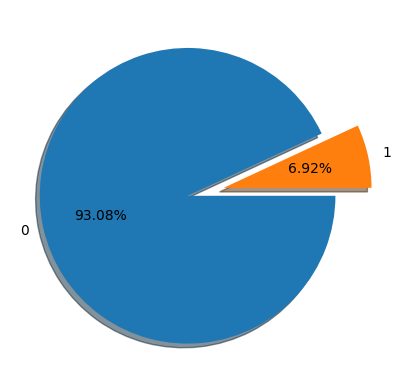

In [70]:
plt.pie(temp.values, labels= temp.index, autopct = '%.2f%%',
        startangle = 0, counterclock=False, explode= [0.05, 0.20], shadow=True)
plt.show()

([<matplotlib.patches.Wedge at 0x24132a9c410>,
 [Text(1.0270199992717004, -0.39399228557924426, '6.0'),
  Text(-1.197687885402063, -0.07445622311892712, '7.0'),
  Text(-0.7628140876866686, 1.0526702558858378, '5.0'),
  Text(-0.3441231807059295, 1.3570479860715443, '8.0'),
  Text(-0.10236429536459896, 1.496503107592667, '4.0'),
  Text(-0.02980019864459265, 1.599722459728794, '9.0')],
 [Text(0.5601927268754728, -0.2149048830432241, '61.66%'),
  Text(-0.6986512664845366, -0.04343279681937415, '24.70%'),
  Text(-0.4694240539610268, 0.647797080545131, '7.31%'),
  Text(-0.2212220447395261, 0.8723879910459926, '4.74%'),
  Text(-0.0682428635763993, 0.9976687383951113, '0.99%'),
  Text(-0.020487636568157448, 1.099809191063546, '0.59%')])

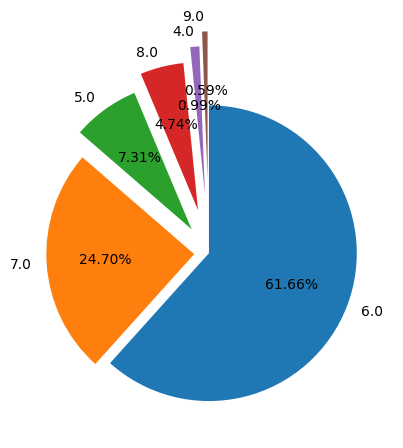

In [80]:
rooms = boston['rm'].round().value_counts()
plt.pie(rooms.values, labels = rooms.index, autopct='%.2f%%',
        startangle= 90, counterclock=False, explode= [0.1*i for i in range(len(rooms))])